# Introducción a pandas



[Pandas](http://pandas.pydata.org/) es una biblioteca de alto rendimiento que proporciona un conjunto completo de estructuras de datos para manipular datos tabulares, proporcionar  indexación de alto rendimiento, alineación automática, remodelación, agrupación, uniones  y capacidades de análisis estadístico.

![](pandas.png)

Las dos estructuras de datos principales en pandas son los objetos **Series** y **DataFrame**. El objeto Series se basa en las características de un `ndarray` de NumPy por lo que proporciona operaciones tales como indexación, etiquetado de ejes, alineación, etc.

## El objeto Series 

El objeto  `Series` es uno de los  bloques de construcción principal  de pandas. Este objeto  representa una matriz indexada,  etiquetada, unidimensional basada en el  objeto `ndarray` de NumPy. Al igual que una matriz, el objeto `Series` puede contener cero o más valores de algún tipo de dato.

`Series` de pandas se diferencia  de las matrices NumPy, por la adición de un conjunto asociado de etiquetas que se utilizan para indexar y acceder  a los elementos de la matriz por valores de etiquetas en lugar de acceder por la posición de un número entero. Este índice etiquetado es una característica de `Series`  y agrega  mayor poder para acceder a los elementos de `Series` que una matriz de   NumPy.


Un objeto `Series` siempre tiene un índice por defecto si no se especifica uno. En este caso predeterminado, pandas creará un índice que consiste en enteros secuenciales a partir de cero. Este comportamiento predeterminado hará que `Series ` inicialmente parezca  a una matriz NumPy. Esto es por diseño, ya que `Series` se derivó de una matriz NumPy. Esto permite aun  que el objeto `Series` sea utilizado por el código de NumPy existente que usa la búsqueda de posición basada en enteros. En versiones recientes de pandas, esta derivación desde `ndarray` ha sido eliminada, pero `Series` sigue siendo compatible con el  API de Numpy.

A pesar de que `Series` con un índice entero  por defecto parece idéntico a una matriz de NumPy, el acceso a los elementos no se da por la posición de un número entero, sino  utilizando valores en el índice (denominado etiquetas). La librería  pandas usará las etiquetas proporcionadas para realizar una búsqueda de valores para esas etiquetas.
A diferencia de una matriz, las etiquetas de índice no necesitan ser números enteros, pueden tener  etiquetas repetidas,  tener conjuntos jerárquicos de etiquetas y se utilizan  en un concepto de pandas, conocido como alineación automática de valores por etiqueta de índice.

Esta alineación automática es el cambio más significativo que `Series` hace sobre `ndarray`. Las operaciones aplicadas a través de múltiples objetos pandas (un ejemplo simple puede ser la adición) no se aplican  a los valores en orden por posición en el objeto `Series`. La biblioteca pandas primero alineará los dos objetos pandas mediante las etiquetas de índice y luego aplicará los valores de operación con etiquetas alineadas. Esto es en cierto modo, un tipo simple de unión y le permite asociar datos con etiquetas de índice comunes sin ningún esfuerzo.

Un índice de pandas es un componente de primera clase de pandas. pandas proporciona diversas especializaciones de índices para diferentes tipos de datos, cada uno de ellos altamente optimizado para esos tipos de datos, ya sean enteros, flotantes, cadenas, fecha y hora o cualquier otro tipo de objeto de pandas. Además,  `Series` puede reindexarse en otros tipos de índices, proporcionando de manera efectiva diferentes vistas en el objeto `Series` utilizando diferentes índices.

Esta capacidad de construir dinámicamente vistas alternativas sobre datos utilizando índices  establece un entorno para la manipulación interactiva de datos, donde los datos pueden permanecer en una estructura única pero que pueden ser fácilmente transformados en vistas diferentes. Esto facilita la creación de un entorno muy interactivo para jugar con la información sin tener que verse  sobrecargado por la estructura, como sucede con las herramientas relacionales como SQL.

In [1]:
import numpy as np
import pandas as pd

Definimos un objeto  `Series`  instanciando un objeto `Series` de pandas con una lista. También se pueden  usar otros objetos de datos, como diccionarios y matrices de  Numpy para instanciar un objeto `Series`. El método básico para crear un objeto `Series` es entonces:

```
s = pd.series(datos, index =index)

```

Aquí `datos`, puede ser diferentes cosas e `index` es una lista de etiquetas de ejes:

* Un diccionario de Python
* Un ndarray
* Un valor escalar



#### Datos  como un ndarray

Si `datos` es un ndarray, `index ` debe tener la misma longitud que `datos`. Si `index ` no es pasado, se creará uno  con valores `[0, ... len(datos) - 1]`.

In [2]:
s1 = pd.Series([1, 2, 3, 4, 5])
s1

0    1
1    2
2    3
3    4
4    5
dtype: int64

No hemos definido un índice en nuestro ejemplo, pero vemos dos columnas en nuestra salida: La columna derecha contiene nuestros datos, mientras que la columna izquierda contiene el índice. Pandas creó un índice por defecto comenzando con 0 pasando a 5, que es la longitud de los datos menos 1, (como se mencionó antes). Podemos acceder directamente al índice y a los valores de `s1`, de la siguiente manera:

In [3]:
print(s1.index)

RangeIndex(start=0, stop=5, step=1)


In [4]:
print(s1.values)

[1 2 3 4 5]


In [5]:
se1 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
se1

a   -1.296961
b    0.190680
c   -0.371868
d    0.734923
e   -2.036607
dtype: float64

In [6]:
se1.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [7]:
pd.Series(np.random.randn(5))

0   -1.225132
1   -0.408330
2    0.758293
3   -1.185181
4   -0.244810
dtype: float64

Si comparamos esto con creando  una matriz en Numpy, todavía hay muchas similitudes:

In [8]:
X = np.array([11, 28, 72, 3, 5, 8])
print(X)
print(s1.values)

# Ambos son del mismo tipo:

print(type(s1.values), type(X))

[11 28 72  3  5  8]
[1 2 3 4 5]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


#### Datos como un diccionario de Python

Si `datos` es un diccionario, el  `index` es pasado a  los valores de los datos correspondientes a las etiquetas del índice. De lo contrario, un índice se construirá a partir de las claves ordenadas del diccionaro, si es posible.


In [9]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}

In [10]:
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [11]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [12]:
poblacion_dict = {'Lima': 38332521,
                   'Santiago': 26448193,
                   'New York': 19651127,
                   'Quito': 19552860,
                   'Rio de Janeiro': 12882135}
poblacion = pd.Series(poblacion_dict)
poblacion

Lima              38332521
New York          19651127
Quito             19552860
Rio de Janeiro    12882135
Santiago          26448193
dtype: int64

De forma predeterminada, se creará el objeto `Series` donde se extraerá el índice de las claves ordenadas. A partir de aquí, se puede realizar el acceso típico al estilo de diccionario:

In [13]:
poblacion['Lima']

38332521

A diferencia de un diccionario, a través de  `Series` también admite operaciones de división (slicing):

In [14]:
poblacion['Lima': 'Quito']

Lima        38332521
New York    19651127
Quito       19552860
dtype: int64

#### Datos como un valor escalar

Si `datos` es un valor escalar, un `index` deben ser considerados. El valor se repetirá para que coincida con la longitud del índice.

In [15]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

Hasta ahora `Series` no ha sido muy diferente a  `ndarrays` de Numpy. Esto cambia, tan pronto como empezamos a definir objetos `Series` con índices individuales:

In [16]:
lenguajes = ['python', 'R', 'C', 'C++']
nivel = [2, 12, 1, 3]
s2 = pd.Series(nivel, index=lenguajes)
s2

python     2
R         12
C          1
C++        3
dtype: int64

Una gran ventaja sobre las matrices  NumPy es obvia del ejemplo anterior: Podemos usar índices arbitrarios.Si agregamos dos `Series` con los mismos índices, obtendremos un objeto `Series` con el mismo índice y se añadirán los valores correspondientes:

In [17]:
frutas = ['pera', 'naranja', 'cereza', 'papaya']
s3 = pd.Series([20, 33, 52, 10], index=frutas)
s4 = pd.Series([17, 13, 31, 32], index=frutas)
print(s3 + s4)
print("suma de s3: ", sum(s3))

pera       37
naranja    46
cereza     83
papaya     42
dtype: int64
suma de s3:  115


Los índices no tienen que ser iguales para la adición en `Serie`. El índice será la *unión*  de ambos índices. Si no existe un índice en ambas `Series`, el valor para esta `Serie` será `NaN`:

In [18]:
frutas1 = ['pera', 'naranja', 'cereza', 'pera']
frutas2 = ['fresa', 'naranja', 'cereza', 'pera']
s5 = pd.Series([20, 33, 52, 10], index=frutas1)
s6 = pd.Series([17, 13, 31, 32], index=frutas2)
print(s5 + s6)

cereza     83.0
fresa       NaN
naranja    46.0
pera       52.0
pera       42.0
dtype: float64


Es posible acceder a valores individuales de una `Serie` o más de un valor mediante una lista de índices:

In [19]:
print(s2['R'])

12


In [20]:
print(s3[['pera', 'naranja', 'cereza']])

pera       20
naranja    33
cereza     52
dtype: int64


Similar a Numpy podemos usar operaciones escalares o funciones matemáticas en una `Serie`:

In [21]:
import numpy as np
print((s2 + 3) * 4)
print(np.sqrt(s2))

python    20
R         60
C         16
C++       24
dtype: int64
python    1.414214
R         3.464102
C         1.000000
C++       1.732051
dtype: float64


### pandas.Series.apply

```
Series.apply(f1, conv1ert_dtype=True, args=(), **kwds)
```

La función *f1* se aplicará a `Series` y retorna  un objeto `Series `o un `DataFrame`, dependiendo de *f1*.

In [22]:
s3.apply(np.sin)

pera       0.912945
naranja    0.999912
cereza     0.986628
papaya    -0.544021
dtype: float64

In [23]:
s6 = pd.Series([20, 21, 12], index=['Lima ', 'Santiago','La Paz'])


In [24]:
def cuadrado(x):
    return x**2
s6.apply(cuadrado)

Lima        400
Santiago    441
La Paz      144
dtype: int64

Definimos  una función personalizada que tome argumentos con palabras claves y pasa esos argumentos a `apply`:

In [25]:
def pers_valor(x, **kwargs):
    for mes in kwargs:
        x += kwargs[mes]
        return x

In [26]:
s6.apply(pers_valor, junio=30, julio=19, agosto = 25)

Lima        50
Santiago    51
La Paz      42
dtype: int64

Usamos una función desde la library Numpy:

In [27]:
s6.apply(np.log)

Lima        2.995732
Santiago    3.044522
La Paz      2.484907
dtype: float64

Definimos una función personalizada que necesita adicionales argumentos posicionales y pasar esos argumentos usando la palabra `args`:

In [28]:
def pers_arg(x, valor_pers):
    return x - valor_pers

In [29]:
s6.apply(pers_arg, args =(5, ))

Lima        15
Santiago    16
La Paz       7
dtype: int64

También podemos usar funciones lambda de Python. Supongamos que tenemos la siguiente tarea: la prueba de la cantidad de fruta de cada tipo. Hay menos de 50 disponibles y  vamos a aumentar la cantidad de frutas  por 10:

In [31]:
frutas = ['sandia', 'durazno', 'mandarina', 'fresa']
s7 = pd.Series([20, 33, 52, 10], index=frutas)

In [32]:
s7.apply(lambda x: x if x > 50 else x+10 )

sandia       30
durazno      43
mandarina    52
fresa        20
dtype: int64

Usamos filtrado con una matriz booleana:

In [33]:
s7[s7 > 30]

durazno      33
mandarina    52
dtype: int64

Una serie puede aparecer como un diccionario ordenado con una longitud fija:

In [35]:
'sandia' in s7

True

### NaN

Sea el siguiente ejemplo:

In [36]:
ciudades = {"London":   8615246, 
          "Berlin":   3562166, 
          "Madrid":   3165235, 
          "Rome":     2874038, 
          "Paris":    2273305, 
          "Vienna":   1805681, 
          "Bucharest":1803425, 
          "Hamburg":  1760433,
          "Budapest": 1754000,
          "Warsaw":   1740119,
          "Barcelona":1602386,
          "Munich":   1493900,
          "Milan":    1350680}
ciudad_series = pd.Series(ciudades)
print(ciudad_series)

Barcelona    1602386
Berlin       3562166
Bucharest    1803425
Budapest     1754000
Hamburg      1760433
London       8615246
Madrid       3165235
Milan        1350680
Munich       1493900
Paris        2273305
Rome         2874038
Vienna       1805681
Warsaw       1740119
dtype: int64


Un problema al tratar con el proceso  de análisis de datos consiste en la falta de datos o valores `NaN`. Pandas hace que sea fácil  trabajar con este tipo de datos.

Si miramos al ejemplo anterior, podemos ver que el índice de nuestra serie es el mismo que las claves del diccionario que usamos para crear `ciudades_series`. Ahora, queremos utilizar un índice que no se superpone con las claves del diccionario. Hemos visto que podemos pasar una lista o una tupla al argumento de la palabra clave `index` para definir el índice. En nuestro siguiente ejemplo, la lista (o tupla) pasada al parámetro de palabra clave `index` no será igual a las claves. Esto significa que algunas ciudades del diccionario tendrán valores `NaN`  y dos ciudades, no aparecen en el diccionario.

In [39]:
ciudades1 = ["London", "Paris", "Zurich", "Berlin", "Stuttgart", "Hamburg"]
ciudades1 = pd.Series(ciudades, index=ciudades1)

ciudades1

London       8615246.0
Paris        2273305.0
Zurich             NaN
Berlin       3562166.0
Stuttgart          NaN
Hamburg      1760433.0
dtype: float64

Debido a los valores de `NaN`, los valores de población para las otras ciudades se convierten en punto flotante. No hay datos faltantes (NaN) en los siguientes ejemplos, por lo que los valores son `int`:

In [40]:
ciudades2 = ["London", "Paris", "Berlin", "Hamburg"]
ciudades2 = pd.Series(ciudades, index=ciudades2)
ciudades2

London     8615246
Paris      2273305
Berlin     3562166
Hamburg    1760433
dtype: int64

### Métodos is.null() y not.null()

En los códigos anteriores, podemos ver que las ciudades, que no están incluidas en el diccionario, obtienen el valor `NaN` asignado. `NaN` significa *not a number *. También puede considerarse como un *valor faltante* en nuestro ejemplo.

Podemos comprobar los *valores faltantes* con los métodos `isnull` y `notnull`:

In [41]:
ciudades1 = ["London", "Paris", "Zurich", "Berlin", "Stuttgart", "Hamburg"]
ciudades1_series = pd.Series(ciudades, index=ciudades1)

print(ciudades1_series.isnull())

London       False
Paris        False
Zurich        True
Berlin       False
Stuttgart     True
Hamburg      False
dtype: bool


In [42]:
print(ciudades1_series.notnull())

London        True
Paris         True
Zurich       False
Berlin        True
Stuttgart    False
Hamburg       True
dtype: bool


Es posible filtrar los datos que faltan con el método  `dropna` de `Series`.

In [43]:
print(ciudades1_series.dropna())

London     8615246.0
Paris      2273305.0
Berlin     3562166.0
Hamburg    1760433.0
dtype: float64


En muchos casos, no se desea filtrar los datos que faltan, sino que se  desea rellenar con algún dato adecuado para estos datos fatants. Un método adecuado en muchas situaciones es `fillna`:

In [44]:
print(ciudades1_series.fillna(0))

London       8615246.0
Paris        2273305.0
Zurich             0.0
Berlin       3562166.0
Stuttgart          0.0
Hamburg      1760433.0
dtype: float64


Bueno, eso no es lo que llamamos *rellenar los datos adecuados para los datos vacíos y/o faltantes* . Si llamamos a `fillna` con un diccionario, podemos proporcionar los datos apropiados, es decir, la población de `Zurich` y `Stuttgart`:

In [45]:
ciudades_faltantes = {"Stuttgart":597939, "Zurich":378884}
ciudades1_series.fillna(ciudades_faltantes)


London       8615246.0
Paris        2273305.0
Zurich        378884.0
Berlin       3562166.0
Stuttgart     597939.0
Hamburg      1760433.0
dtype: float64

## Indexación avanzada o multinivel

La indexación avanzada o multinivel está disponible tanto para `Series` como para los `Data Frames`. Es una forma fascinante de trabajar con datos dimensionales superiores, usando las estructuras de datos de  Pandas. Es una forma eficiente de almacenar y manipular datos de dimensiones arbitrariamente elevadas con  estructuras `1 -dimensión ` (`Series`) y `2-dimensiones` (`Data Frame`). En otras palabras, podemos trabajar con datos dimensionales superiores en dimensiones inferiores.

In [46]:
ciudades = ["Vienna", "Vienna", "Vienna",
          "Hamburg", "Hamburg", "Hamburg",
          "Berlin", "Berlin", "Berlin",
          "Zürich", "Zürich", "Zürich"]
indices = [ciudades, ["pais", "area", "poblacion",
                     "pais", "area", "poblacion",
                     "pais", "area", "poblacion",
                     "pais", "area", "poblacion"]]

print(indices)

[['Vienna', 'Vienna', 'Vienna', 'Hamburg', 'Hamburg', 'Hamburg', 'Berlin', 'Berlin', 'Berlin', 'Zürich', 'Zürich', 'Zürich'], ['pais', 'area', 'poblacion', 'pais', 'area', 'poblacion', 'pais', 'area', 'poblacion', 'pais', 'area', 'poblacion']]


In [47]:
datos = ["Austria", 414.60,     1805681,
        "Germany",   755.00,     1760433,
        "Germany",   891.85,     3562166,
        "Switzerland", 87.88, 378884]
ciudad_series = pd.Series(datos, index=indices)
print(ciudad_series)

Vienna   pais             Austria
         area               414.6
         poblacion        1805681
Hamburg  pais             Germany
         area                 755
         poblacion        1760433
Berlin   pais             Germany
         area              891.85
         poblacion        3562166
Zürich   pais         Switzerland
         area               87.88
         poblacion         378884
dtype: object


Podemos acceder a los datos de una ciudad de la siguiente forma:

In [48]:
print(ciudad_series["Vienna"])

pais         Austria
area           414.6
poblacion    1805681
dtype: object


Podemos acceder la información de `pais`, `area` o `población`, de las siguientes formas:

In [49]:
print(ciudad_series["Vienna"]["area"])

414.6


In [50]:
print(ciudad_series["Vienna", "area"])

414.6


También podemos obtener el contenido de varias ciudades al mismo tiempo usando una lista de nombres de ciudades como una clave:

In [51]:
print(ciudad_series[["Hamburg", "Berlin"]])

Hamburg  pais         Germany
         area             755
         poblacion    1760433
Berlin   pais         Germany
         area          891.85
         poblacion    3562166
dtype: object


Si el índice está ordenado, también podemos aplicar una operación de `división`:

In [52]:
ciudad_series = ciudad_series.sort_index()
print("ciudad_series con indices ordenados:")
print(ciudad_series)

print("\n\nDividiendo   ciudad_series:")
print(ciudad_series["Berlin":"Vienna"])

ciudad_series con indices ordenados:
Berlin   area              891.85
         pais             Germany
         poblacion        3562166
Hamburg  area                 755
         pais             Germany
         poblacion        1760433
Vienna   area               414.6
         pais             Austria
         poblacion        1805681
Zürich   area               87.88
         pais         Switzerland
         poblacion         378884
dtype: object


Dividiendo   ciudad_series:
Berlin   area          891.85
         pais         Germany
         poblacion    3562166
Hamburg  area             755
         pais         Germany
         poblacion    1760433
Vienna   area           414.6
         pais         Austria
         poblacion    1805681
dtype: object


En el siguiente ejemplo, mostramos que también es posible acceder a claves internas:

In [53]:
print(ciudad_series[:, "area"])

Berlin     891.85
Hamburg       755
Vienna      414.6
Zürich      87.88
dtype: object


Podemos reordenar los niveles de los índices:

In [54]:
ciudad_series.swaplevel()

area       Berlin          891.85
pais       Berlin         Germany
poblacion  Berlin         3562166
area       Hamburg            755
pais       Hamburg        Germany
poblacion  Hamburg        1760433
area       Vienna           414.6
pais       Vienna         Austria
poblacion  Vienna         1805681
area       Zürich           87.88
pais       Zürich     Switzerland
poblacion  Zürich          378884
dtype: object

### Ejemplo de repaso

In [55]:
s8 = pd.Series([909976, 8615246, 2872086, 2273305])
s8

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [56]:
s8.index

RangeIndex(start=0, stop=4, step=1)

In [57]:
s8.values

array([ 909976, 8615246, 2872086, 2273305])

In [59]:
s8.index = ["Berlin", "Paris", "Londres", "Singapur"]
s8.names = "Poblacion"
s8

Berlin       909976
Paris       8615246
Londres     2872086
Singapur    2273305
dtype: int64

In [60]:
# Otra manera de escribir esto:

s8 = pd.Series([909976, 8615246, 2872086, 2273305], name="Poblacion", index=["Berlin", "Paris", "Londres", "Singapur"])
s8

Berlin       909976
Paris       8615246
Londres     2872086
Singapur    2273305
Name: Poblacion, dtype: int64

In [61]:
# Accediendo a los elementos de Series

s8["Londres"]

2872086

In [62]:
s8.Paris

8615246

In [63]:
s8[["Berlin", "Singapur"]]

Berlin       909976
Singapur    2273305
Name: Poblacion, dtype: int64

In [64]:
# Calculemos algunas cosas de estadistica descriptiva

s8.median(), s8.mean(), s8.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [65]:
 s8.min(), s8.max()

(909976, 8615246)

In [66]:
 s8.quantile(q=0.25), s8.quantile(q=0.5), s8.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

Todo lo anterior son combinados en la salida del método `describe`, que proporciona una resumen de los datos representados por el objeto `Series`:

In [67]:
s8.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Poblacion, dtype: float64

Usando el método `plot`, podemos producir fácilmente gráficos que visualizan los datos en el objeto `Series`. La librería `pandas` utiliza `matplotlib` para producir gráficos, y opcionalmente podemos pasar una instancia de `MatplotlibAxes` al método `plot` a través del argumento `ax`. El tipo del gráfico se especifica usando el argumento `kind` (las opciones válidas son `line`, `hist`, `bar`, `barh`, `box`, `kde`, `density`, `area` y `pie`).

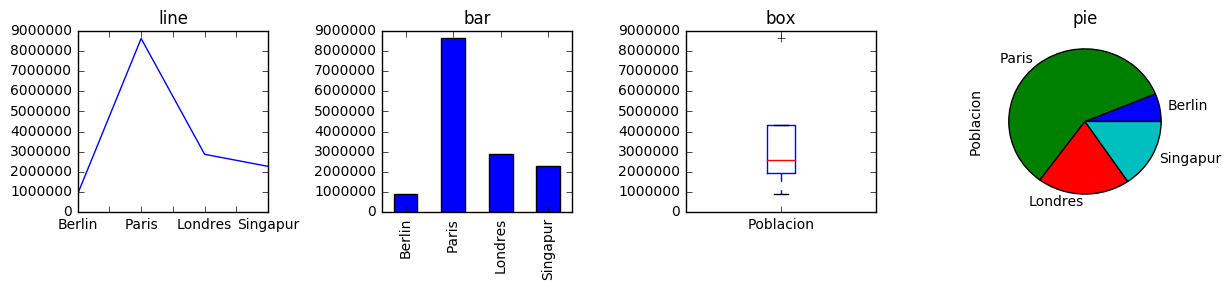

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

s8.plot(ax=axes[0], kind='line', title="line")
s8.plot(ax=axes[1], kind='bar', title="bar")
s8.plot(ax=axes[2], kind='box', title="box")
s8.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout()